In [4]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()
# названия переменных
print(iris.feature_names)
# данные
print(iris.data[:10])
# целевая переменная
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
iris_frame = DataFrame(iris.data)
# обозначение колонок и целевых переменных
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


задача уменьшить количество признаков - уменьшить массив-матрицу данных для того чтобы найти лямбду ? 

найде лямбду можно найти собственные вектора
а что дальше? 

собственные вектора для каждого сорта или для всех сразу? 

что с ними делать дальше? 

если возьмем новый цветок и нам потребуется определить его сорт мы что будем делать? 

сравнивать? с чем? 

прогонять через что? 

как работает это? 




In [9]:
model = KMeans(n_clusters=3)
model.fit(iris.data)
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
print(predicted_label)

[1]


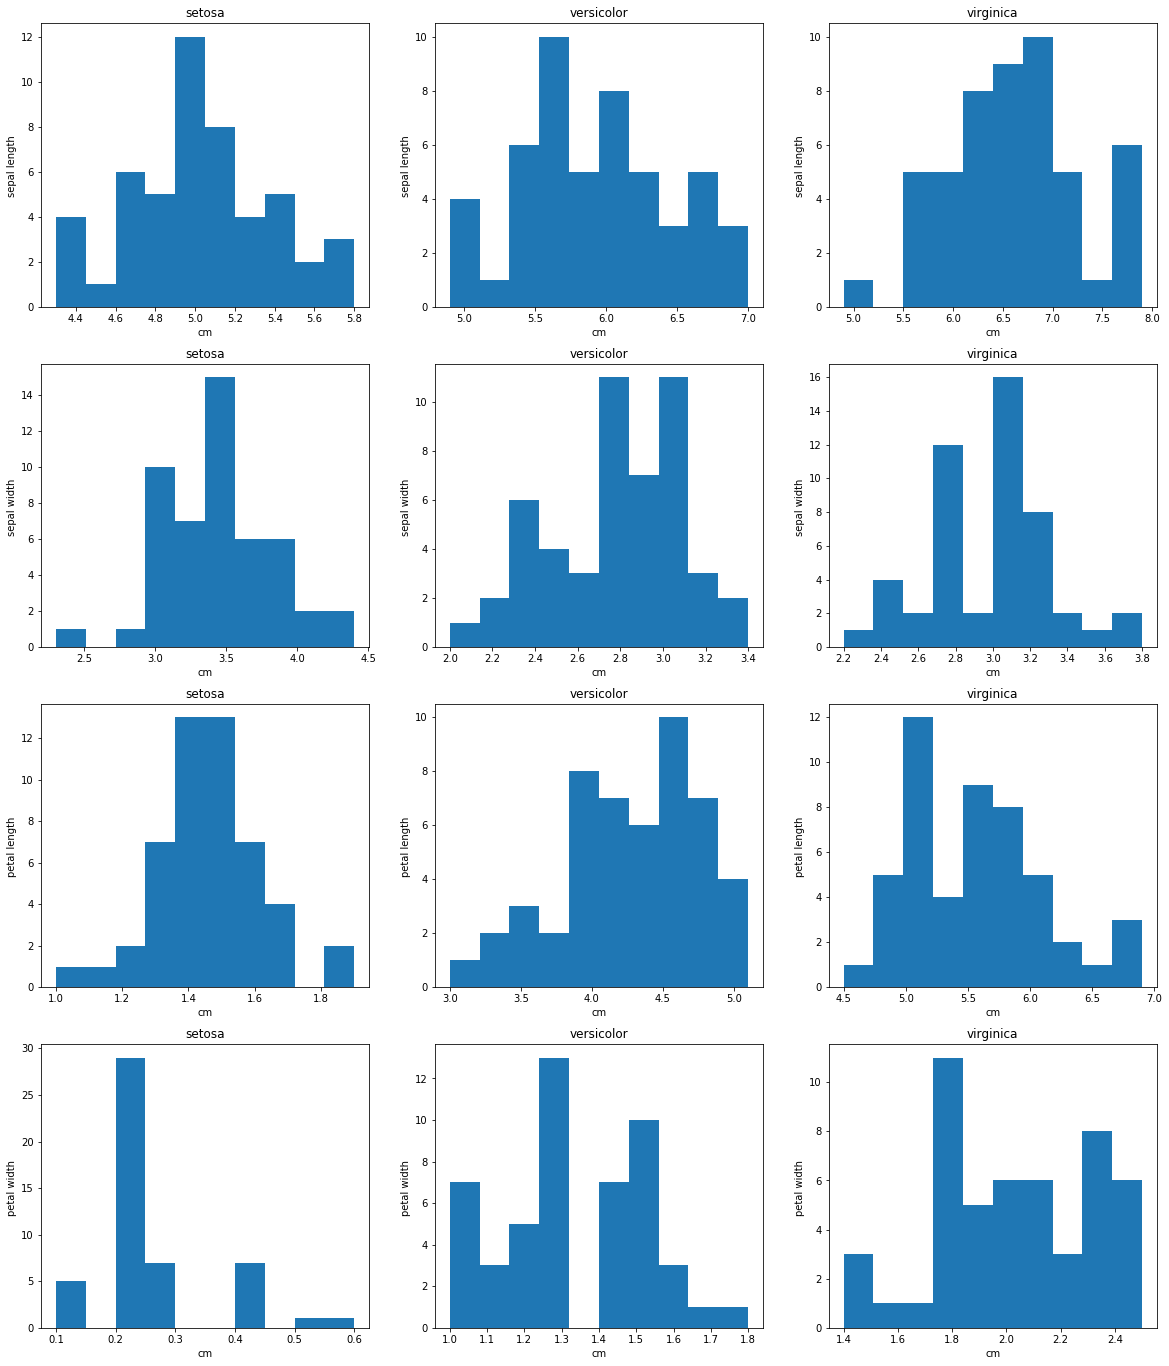

In [10]:
# Статистика: гистограмма по каждому признаку: 
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
       plot_number += 1
       pyplot.subplot(4, 3, plot_number)
       pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
       pyplot.title(target_name)
       pyplot.xlabel('cm')
       pyplot.ylabel(feature_name[:-4])

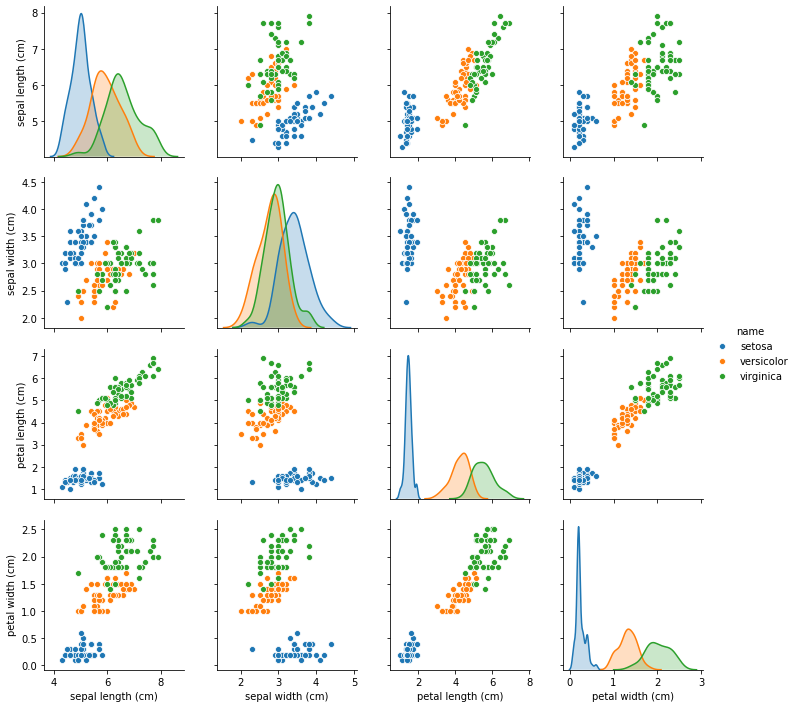

In [11]:
import seaborn as sns

sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

меньше всего сорта перемешаны при использовании признака petal width и petal length

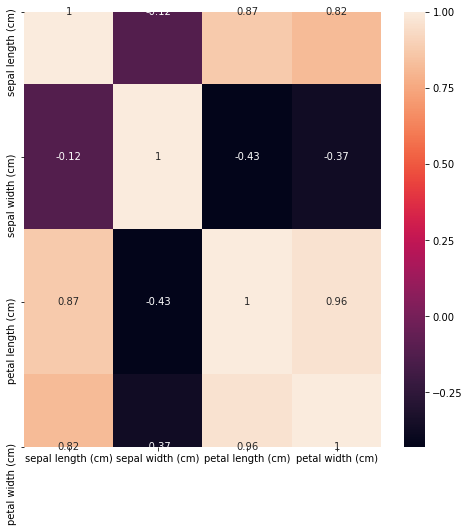

In [12]:
import seaborn as sns

corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, ax=ax)

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3, random_state = 0)
train_data

,petal length (cm),petal width (cm)
60,3.5,1.0
116,5.5,1.8
144,5.7,2.5
119,5.0,1.5
108,5.8,1.8
...,...,...
9,1.5,0.1
103,5.6,1.8
67,4.1,1.0
117,6.7,2.2


Кластеризация — K-means

In [1]:
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

NameError: name 'KMeans' is not defined

In [15]:
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']],
    iris_frame[['target']], test_size = 0.3)
model = KMeans(n_clusters=3)
model.fit(train_data)
model_predictions = model.predict(test_data)
print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.08888888888888889
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        17
           2       0.20      0.31      0.24        13

    accuracy                           0.09        45
   macro avg       0.07      0.10      0.08        45
weighted avg       0.06      0.09      0.07        45



какая-то чудовищно низкая точность Ж(